In [1]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Some hidden code... to show/hide this cell's raw code input, click (or double click if stubborn!) <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
from IPython.core.display import HTML
def css_styling():
    styles = open("./STUFF/colors.css", "r").read()
    return HTML(styles)
css_styling()

# CH160: Introduction to Python (Vol II)

<img src="./STUFF/kb_2.jpg" width="600">

In this session, we are going to analyse a set of data that have been generated via a molecular dynamics simulation. In order to do so, we are going to introduce the following basic concepts:

- Importing packages in Python
- Work with numpy arrays in Python
- Plotting in Python

In particular, let's consider a molecular dynamics simulation of 215 water molecules:

<img src="./STUFF/water_box.png" width="600">

First things first, we have to read the data we need from a file (it's called "md_data.dat" and FYI can be found in the "./STUFF" subdirectory of the CH160 GitHub tree) into this Jupyter notebook. To do this, we are going to leverage a very popular Python package calld [numpy](https://numpy.org/): it is a very useful tool to handle numbers, and particularly arrays of numbers (more on that later!) in Python. How are we going to make this happen, I hear you ask...

<div class=warn>
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser and go to [this page](https://mnf145.csc.warwick.ac.uk:8987/).<br>
* <b>Step 2</b>: Enter your SCRTP username and password and press the "Start Server" button.<br>
* <b>Step 3</b>: Wait (it could take a few minutes) until the blue blox says "Jupyter notebook server running!". At that point, click on the weblink below said message.<br>
* <b>Step 4</b>: Select the Jupyter Notebook you want to work on. Remember to make a copy of the orginal notebook (which is read only). To do so, in the toolbar on top of the notebook, select File and then Make a Copy <br>
* <b>Step 5</b>: You're all set! <br>
* <b>Step 6</b>: <font color="red">When you are done, remember to click the "Stop Server" button in the launcher web browser tab.</font> Please do, it's really quite important. <br>
<b> Remember: </b> You can access your copy of the Notebook at any time from any device off and on campus by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced! <br>
<div/>

### Importing packages 
One beautiful truth about Python is that there exist countless chunks of code (from rather simple things to entire frameworks for machine learning!) that can be leveraged just be "importing" the corresponding "package". This is usually done at the very beginning of the Notebook, but let's give it a go now with numpy:

In [4]:
import numpy as np

Easy as that! The "import" keyword tells Python to import the numpy package. The "as np" syntax is because we are lazy: anytime we will be calling numpy from now on, we just need to call np as opposed to numpy. Not so essential in here, but some packages have horribly long names. Crucially, now that we have imported numpy, we have access to the very many functions that are available within this package. As a start, we are going to use the "loadtxt" function of numpy: this allows us to read the data in our "md_data.dat" file into the Jupyter Notebook:

In [5]:
data = np.loadtxt('./STUFF/md_data.dat',skiprows=1)

Here, we have stored the data contained in the "md_data.dat" file into a single object (it's actually a numpy array - more on that later!) called "data". Note that in order to call the "loadtxt" function we simply have to go for "np.The_fuction_you_want_to_use>". We are going to talk a bit more about functions in the next Key Skill session. For now, let also also note that we have told numpy to skip the first line via the "skiprows=1" argument, as that line contains a header (not data!). Where do I get this information from? Google, folks, it's lways google. Try to google "numpy read text file" and see for yourself (and yes, there are *many* other ways to do it!)

<div class=warn>

<h2> Pandas and Seaborn </h2>

Believe it or not, these oddly named packages are very popular options to deal with fancy plots and data frames. Let's try to use them to obtain a cool-looking density plot of our molecular dynamics data in terms of temperature and pressure.

- **Step 1**: import pandas as pd, seaborn as sns
- **Step 2**: run the following code:

```%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
data_df = pd.DataFrame(data)
data_df = data_df.iloc[10:]
plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k') 
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
sns.kdeplot(data_df.iloc[:,2], data_df.iloc[:,3], shade=True, cmap="Blues", cbar=True)
plt.xlabel('Temperature [K]', fontsize=16)
plt.ylabel('Pressure [bar]', fontsize=16)
plt.show()```

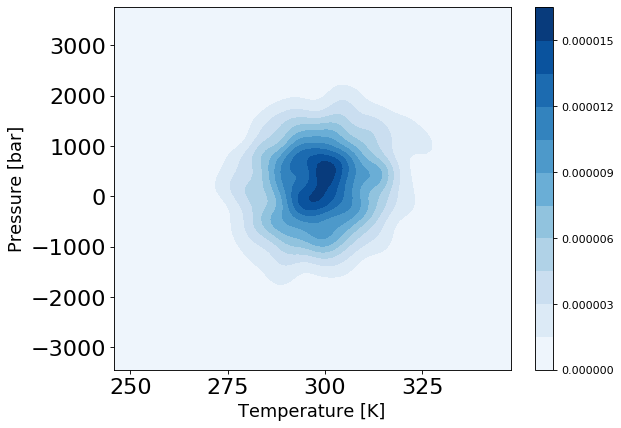

In [6]:
import pandas as pd
import seaborn as sns

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
data_df = pd.DataFrame(data)
data_df = data_df.iloc[10:]
plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k') 
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
sns.kdeplot(data_df.iloc[:,2], data_df.iloc[:,3], shade=True, cmap="Blues", cbar=True)
plt.xlabel('Temperature [K]', fontsize=16)
plt.ylabel('Pressure [bar]', fontsize=16)
plt.show()

Ok, so now that we have our data, let's have a look at them. The "print" function can always help, and it is very good practice to print stuff often, to check that everything is alright with your coding.

In [7]:
print(data)

[[ 1.00000000e-01 -1.03020000e+00  4.19617800e+00 -1.57635059e+03]
 [ 2.00000000e-01 -1.10679000e+00  1.83750580e+02 -2.38131787e+03]
 [ 3.00000000e-01 -1.10093000e+00  1.98862427e+02 -2.19553540e+03]
 ...
 [ 9.98000000e+01 -1.02698000e+00  3.09688721e+02 -3.86067230e+02]
 [ 9.99000000e+01 -1.01869000e+00  2.89386047e+02  6.15468079e+02]
 [ 1.00000000e+02 -1.03247000e+00  3.06726837e+02 -9.97725220e+01]]


Apparently, we have four columns ad quite a few lines - so many, in fact, that Python refuses to print them all. We can make a more detailed enquire about the shape of our data by useing the "shape" function:

In [8]:
data.shape

(1000, 4)

That's great. However, in many cases we need to access a specific element, or a specific sets of elements, from an object like "data". For instance, we might want to access the first two elements of the third column - this is how it's done:

In [9]:
print(data[0:2,2])

[  4.196178 183.75058 ]


Confused? That's because in order to deal with blocks of data we first have to understand arrays. Here we go...

### Arrays
In many cases, we would love to store some numbers (such as the molecular dynamics data we are dealing with) in a single object (such as the "data" object above). This is easily done by using either arrays or lists. Arrays are better when dealing with numbers, so we'll stick to those for the time being. Luckily enough, numpy is here to help: there are arrays and numpy arrays; the latter are better, because you can use numpy to perform a lot of interesting operations with them in no time. The first thing you have to do with a numpy array is to declare/initialise it:

In [10]:
# If you know how many elements should be contained in your numpy array, say, 10...
array_1 = np.zeros(10)
print(array_1) # always good to print stuff to make sure you are doing the right thing!

# If you don't really know how many elements you want in your array, no problem...
array_2 = np.array([])
print(array_2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[]


So: we have stored in an array object called "array_1" the result of "np.zeros(10)". "np.zeros" calls the function "zeros", one of the very many available when using numpy - which we call "np" in here, remember? If you specify a number (10 in the example above) your array will contain that many elements, all of them initialised to zero. If you don't know how many elements you want your array to be, the syntax is slighty different, and uses the "array" function of numpy to actually transform the empty list [] into a numpy array of unknown length. Ok, now let's populate our array!

In [11]:
array_1[2] = 30
print(array_1)

[ 0.  0. 30.  0.  0.  0.  0.  0.  0.  0.]


Accessing a single element of a numpy array is easy, you just specify the index you want in between [] brackets - but remember, indexing starts from 0, not 1!

The "data" array we are dealing with, though, has two dimensions, in that it has rows and columns. In that case, you can access the element in column $i$ and row $j$ as [i,j], that is:

In [12]:
data[7,3]

-63.852051

This gives you the element in the sixth row and second column. What about accessing a certain range of elements? Say, rows from 4 to 10 within th 1st and 4th column:

In [13]:
data[3:10,[0,3]]

array([[ 4.00000000e-01, -9.30815735e+02],
       [ 5.00000000e-01, -1.56255176e+03],
       [ 6.00000000e-01, -9.66629395e+02],
       [ 7.00000000e-01, -1.18484448e+03],
       [ 8.00000000e-01, -6.38520510e+01],
       [ 9.00000000e-01, -4.35344330e+02],
       [ 1.00000000e+00,  1.44725854e+03]])

Here, we have specified a contiguous range of rows (from 3 to 10) via the ":" operator. Note that the ":" operator alone retrieves all columns or rows. In order to select non contiguous columns (1st and 4th) instead we had to add another [] and separate the indexes via a ",". For instance, to get the first rows and all the columns...

In [14]:
data[0,:]

array([ 1.00000000e-01, -1.03020000e+00,  4.19617800e+00, -1.57635059e+03])

Once more, do remember that in Python (and C++ as well, and a few others...) the indexing of arrays starts from 0, not 1. So, the 1st element of your array is actually indexed as 0, not 1. hence, "[0,:]" correspond to the first row! Yes, yes, very confusing - you'll get used to it!

<div class=warn>

<h2> Playing with Arrays </h2>

- **Step 1**: Create a numpy array ar_A that contains 100 random numbers
- **Step 2**: Create a numpy array ar_B that contains 100 random numbers
- **Step 3**: Extract the first 10 elements from ar_A - and save them into another array ar_AA. Do the same for ar_B (saving into ar_BB) but extract the last 10 elements in this case.
- **Step 4**: Calculate the scalar product of ar_AA and ar_BB

### Plots & Graphs

So, 1000 lines, 4 columns. What's in each column? This information is in the header (which we have told "loadtxt" to skip!), so we are going to use the following trick (I Googled it!) to have a look...

In [15]:
infile = open('./STUFF/md_data.dat', 'r')
firstLine = infile.readline()
print(firstLine)

# Time [ps] | E_Tot [kJ/mol] | T [K] | P [bar



First column is time, in ps - this is molecular dynamics simulation after all! Then, we have the total energy of the system in kJ/mol, followed by temperature and pressure (K and bar, respectively). Each line reports the time, energy, temperature and pressure corresponding to a particular frame along our molecular dynamics trajectory. Our goal is to compute the ensemble average of $E_{Tot}$, so let's have a look at it. In ordert to generate a plot, we are going to import another very popular package called matplotlib:

In [16]:
# weird-looking line... Google it if you so wish ;)
%matplotlib inline 

# importing matplotlib
import matplotlib

# impotting a set of fancy functionalities within matplotlib
import matplotlib.pyplot as plt

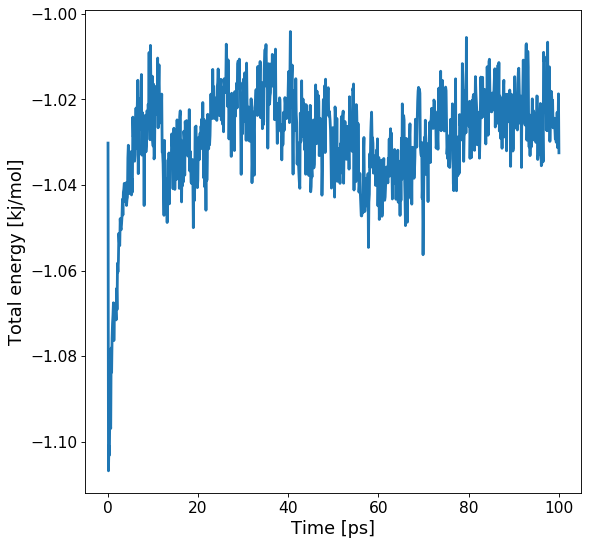

In [17]:
# Let's plot the energy vs time

# figsize determine the actual size of the figure
plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k') 

# The data to be plotted - using arrays!
plt.plot(data[:,0], data[:,1],linewidth=2.5)

# Labeling of x and y axes
plt.xlabel('Time [ps]',fontsize=16)
plt.ylabel('Total energy [kj/mol]',fontsize=16)

# Bigger labels is better!
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

axes = plt.gca()

# If you want to limit the plotting to a specific x or y range...
# axes.set_xlim([0,100])
# axes.set_ylim([0,100])

# Show the final result
plt.show()

Our simulation is 100 ps long, and as you can see, the energy oscillates wildly before levelling toward a fairly constant value (you can ask me why later!). This is an NVT simulation, so we are not expecting the energy to be constant (remember fluctuations are *always* there, though, even in NVE!), but in a "good" NVT simulation energy conservation should still be a reality. 

### Some statistics...

In [ ]:
# clean the data!
# Histogram vs PDF

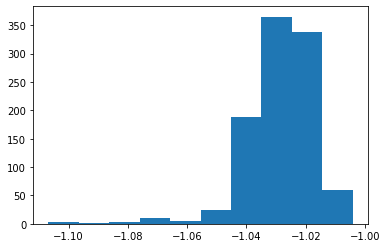

In [33]:
plt.hist(data[:,1])
plt.show()

In [39]:
h_1 = np.histogram(data[:,1],bins=10)
print(h_1)

(array([  4,   2,   3,  10,   5,  25, 188, 365, 338,  60]), array([-1.10679 , -1.096524, -1.086258, -1.075992, -1.065726, -1.05546 ,
       -1.045194, -1.034928, -1.024662, -1.014396, -1.00413 ]))


In [37]:
np.histogram(data[:,1],bins=10,density='true')

(array([ 0.38963569,  0.19481785,  0.29222677,  0.97408923,  0.48704461,
         2.43522307, 18.31287746, 35.55425677, 32.92421586,  5.84453536]),
 array([-1.10679 , -1.096524, -1.086258, -1.075992, -1.065726, -1.05546 ,
        -1.045194, -1.034928, -1.024662, -1.014396, -1.00413 ]))

In [49]:
x = h_1[1]
y = h_1[0]
for i in range (0,len(x)):
    print(x[i])

-1.10679
-1.096524
-1.086258
-1.0759919999999998
-1.065726
-1.05546
-1.045194
-1.0349279999999998
-1.024662
-1.014396
-1.00413


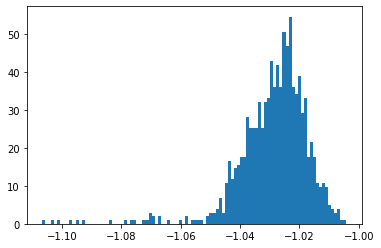

In [28]:
plt.hist(data[:,1],density="true",bins=100)
plt.show()

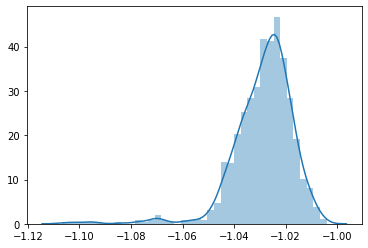

In [26]:
sns.distplot(data[:,1]);

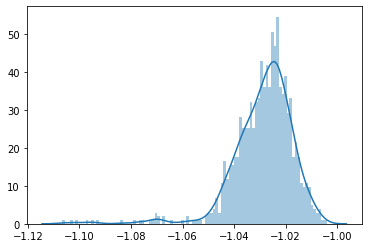

In [27]:
sns.distplot(data[:,1],bins=100);

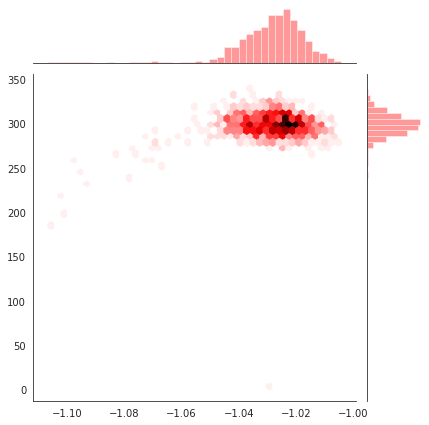

In [32]:
with sns.axes_style("white"):
    sns.jointplot(x=data[:,1], y=data[:,2], kind="hex", color="r");

<div class=warn>

<h2>The NVT case </h2>

- Compute the ensemble average of the energy within the NVT ensemble. Use the following expression:

$$
E = \langle E_{NVT} \rangle = \frac{1}{Q(NVT)}\sum_{i=1}^{N}e^{-\beta E_i}E_i \\
                            = \frac{1}{\sum_{i=1}^{N}e^{-\beta E_i}}\sum_{i=1}^{N}e^{-\beta E_i}E_i
$$

- Compare your result with what we have previously obtained working in the NVE ensemble

Everything you need can be Googled!

<div class=warn>

<h2> Homework </h2>

Compute the extent of energy fluctuations with respect to our data - in terms of e.g. its variance. Everything you need can be Googled!